In [44]:
import pandas as pd
import re
import string
import math
import numpy as np

In [3]:
news=pd.read_csv('news.csv',low_memory=False)

In [5]:
news.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [6]:
import seaborn as sb

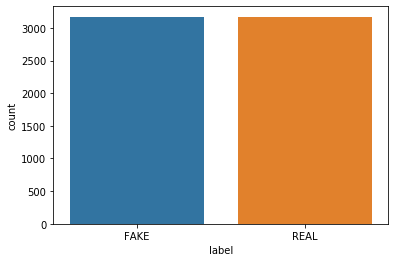

In [7]:
sb.countplot(news['label'])

In [8]:
news=news.drop('Unnamed: 0',axis=1)

In [9]:
news['length']=news['text'].apply(len)
news.head()

,title,text,label,length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


In [10]:
news.columns=['Headline','Body','label','length']
news.head()

,Headline,Body,label,length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1840


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEE40DF0B8>,
      dtype=object)

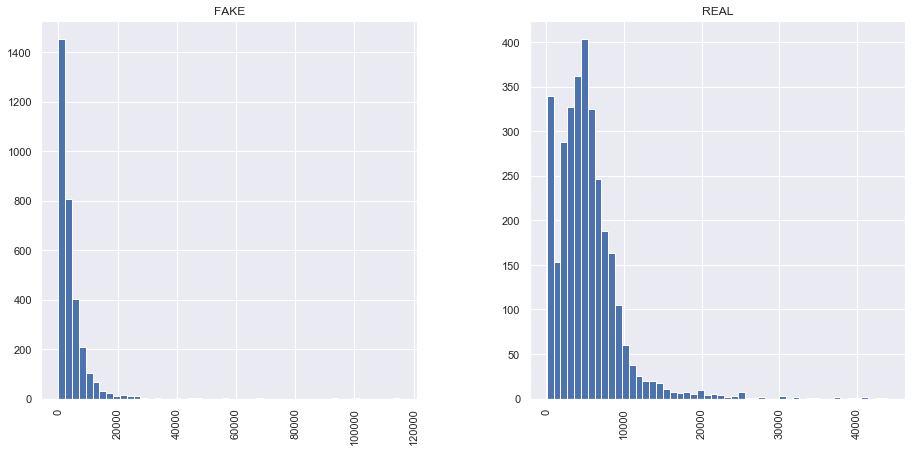

In [14]:
sb.set()
news.hist(column='length', by='label', bins=50,figsize=(15,7))

In [7]:
news['Body']=news['Body'].apply(lambda x: re.sub('—','',x))#removing dashses

In [8]:
news['Body']=news['Body'].apply(lambda x: x.strip())#removing leading or trailing spaces

In [9]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
news['Headline']=news['Headline'].apply(lambda x:expand_contractions(x))
news['Body']=news['Body'].apply(lambda x:expand_contractions(x))

In [10]:
news['Headline']=news['Headline'].apply(lambda x: x.lower())
news['Body']=news['Body'].apply(lambda x: x.lower())

In [11]:
news['Headline']=news['Headline'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
news['Body']=news['Body'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [12]:
news['Body']

0       daniel greenfield a shillman journalism fellow...
1       google pinterest digg linkedin reddit stumbleu...
2       us secretary of state john f kerry said monday...
3       kaydee king kaydeeking november 9 2016 the les...
4       it is primary day in new york and frontrunners...
                              ...                        
6330    the state department told the republican natio...
6331    the ‘p’ in pbs should stand for ‘plutocratic’ ...
6332    antitrump protesters are tools of the oligarch...
6333    addis ababa ethiopia president obama convened ...
6334    jeb bush is suddenly attacking trump here is w...
Name: Body, Length: 6335, dtype: object

In [30]:
news['Body']=news['Body'].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ",x))
news['Headline']=news['Headline'].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ",x))

In [35]:
from nltk.corpus import stopwords

In [7]:
#removing stopwords
news['Headline']=news['Headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))
news['Body']=news['Body'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))


In [3]:
#cleaned data
news1=pd.read_csv('news_updated.csv')

In [4]:
news1.head()

,Headline,Body,label,length
0,smell hillary fear,daniel greenfield shillman journalism fellow f...,FAKE,7518
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,FAKE,2646
2,kerry go paris gesture sympathy,us secretary state john f kerry said monday st...,REAL,2543
3,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november 9 2016 lesson ...,FAKE,2660
4,battle new york primary matters,primary day new york frontrunners hillary clin...,REAL,1840


In [5]:
#removing numbers
news1['Body']=news1['Body'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))
news1['Headline']=news1['Headline'].apply(lambda x: re.sub('\w*\d\w*','', str(x)))

In [6]:
news1.head()

,Headline,Body,label,length
0,smell hillary fear,daniel greenfield shillman journalism fellow f...,FAKE,7518
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,FAKE,2646
2,kerry go paris gesture sympathy,us secretary state john f kerry said monday st...,REAL,2543
3,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november lesson tonig...,FAKE,2660
4,battle new york primary matters,primary day new york frontrunners hillary clin...,REAL,1840


In [7]:
import nltk

In [8]:
#lemmatization
from nltk.stem import WordNetLemmatizer

In [9]:
lemmatizer=WordNetLemmatizer()
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()

In [10]:
def lemma(sent):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(sent)])

In [11]:
news1['lemma_headline']=news1['Headline'].apply(lambda x: lemma(str(x)))
news1['lemma_body']=news1['Body'].apply(lambda x: lemma(str(x)))

In [12]:
news1.head()

,Headline,Body,label,length,lemma_headline,lemma_body
0,smell hillary fear,daniel greenfield shillman journalism fellow f...,FAKE,7518,smell hillary fear,daniel greenfield shillman journalism fellow f...
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,FAKE,2646,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...
2,kerry go paris gesture sympathy,us secretary state john f kerry said monday st...,REAL,2543,kerry go paris gesture sympathy,u secretary state john f kerry said monday sto...
3,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november lesson tonig...,FAKE,2660,bernie supporter twitter erupt anger dnc tried...,kaydee king kaydeeking november lesson tonight...
4,battle new york primary matters,primary day new york frontrunners hillary clin...,REAL,1840,battle new york primary matter,primary day new york frontrunners hillary clin...


In [20]:
news1['Body+Headline']=news1[['lemma_headline' , 'lemma_body']].apply(lambda x: ' '.join(x),axis=1)

In [21]:
news1.head()

,Headline,Body,label,length,lemma_headline,lemma_body,Body+Headline
0,smell hillary fear,daniel greenfield shillman journalism fellow f...,FAKE,7518,smell hillary fear,daniel greenfield shillman journalism fellow f...,smell hillary fear daniel greenfield shillman ...
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,FAKE,2646,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,watch exact moment paul ryan committed politic...
2,kerry go paris gesture sympathy,us secretary state john f kerry said monday st...,REAL,2543,kerry go paris gesture sympathy,u secretary state john f kerry said monday sto...,kerry go paris gesture sympathy u secretary st...
3,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november lesson tonig...,FAKE,2660,bernie supporter twitter erupt anger dnc tried...,kaydee king kaydeeking november lesson tonight...,bernie supporter twitter erupt anger dnc tried...
4,battle new york primary matters,primary day new york frontrunners hillary clin...,REAL,1840,battle new york primary matter,primary day new york frontrunners hillary clin...,battle new york primary matter primary day new...


In [33]:
data=news1[news1['label']=='REAL']

### Test-train split

In [13]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = \
train_test_split(news1['Body+Headline'],news1['label'] ,test_size=0.33,random_state=7)

print(len(X_train), len(X_test), len(X_train) + len(X_test))

4244 2091 6335


### Creating Document term matrix

In [23]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

In [24]:
cv=CountVectorizer(analyzer='word')

In [25]:
count_train = cv.fit_transform(X_train)
count_test = cv.transform(X_test)

In [26]:
count_df=pd.DataFrame(count_train.A, columns=cv.get_feature_names())

In [27]:
count_df.head()

,aa,aaa,aaaa,aaaaadd,aaaasetlayoutnew,aab,aachen,aadhar,aae,aahing,...,zuylenwood,zvai,zvezda,zvi,zvulun,zweiter,zwick,zwicker,zwischenmenschlicher,zyuganov
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
tfidf_vectorizer=TfidfVectorizer()

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [29]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

In [34]:
#import sys
#!{sys.executable} -m pip install WordCloud

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [ ]:
# Function for generating word clouds
#def generate_wordcloud(data,title):
   wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Transposing document term matrix
count_df1=count_df.transpose()

# Plotting word cloud for each product
for index,product in enumerate(count_df1.columns):
    generate_wordcloud(count_df1[product].sort_values(ascending=False),product)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [39]:
modelList=[LogisticRegression,DecisionTreeClassifier,LinearSVC,KNeighborsClassifier,SGDClassifier,RandomForestClassifier,
          PassiveAggressiveClassifier,AdaBoostClassifier,GradientBoostingClassifier]

In [40]:
model1=MultinomialNB()
model1.fit(count_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
predictions = model1.predict(count_test)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

accuracy : 0.890

 classification report 

              precision    recall  f1-score   support

        FAKE       0.92      0.86      0.89      1061
        REAL       0.87      0.92      0.89      1030

    accuracy                           0.89      2091
   macro avg       0.89      0.89      0.89      2091
weighted avg       0.89      0.89      0.89      2091



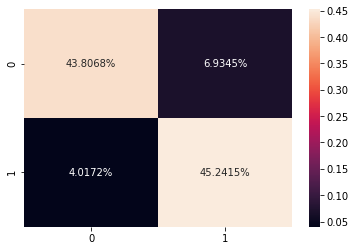

In [45]:
score1=metrics.accuracy_score(y_test,predictions)
print('accuracy : %0.3f' %score1)

cm=confusion_matrix(y_test,predictions)
sb.heatmap(cm/np.sum(cm),annot=True,fmt= '.4%')

print('\n classification report \n')
print(classification_report(y_test,predictions))

In [46]:
accuracy=[]
def classifier(model):
    model=model()
    model_name = model.__class__.__name__
    z=model.fit(tfidf_train,y_train)
    predictions = z.predict(tfidf_test)
    print(model_name,'\n')
    print('confusion matrix \n')
    cm=confusion_matrix(y_test,predictions)
    sb.heatmap(cm/np.sum(cm),annot=True,fmt= '.4%')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    score=metrics.accuracy_score(y_test,predictions)
    print('accuracy : %0.3f' %score)
    print('\n classification report \n')
    print(classification_report(predictions, y_test))
    accuracy.append([model_name,score])



LogisticRegression 

confusion matrix 



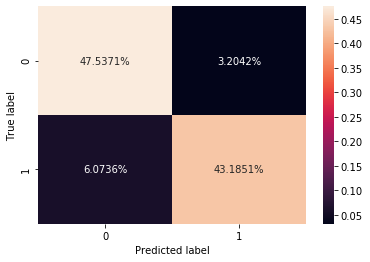

accuracy : 0.907

 classification report 

              precision    recall  f1-score   support

        FAKE       0.94      0.89      0.91      1121
        REAL       0.88      0.93      0.90       970

    accuracy                           0.91      2091
   macro avg       0.91      0.91      0.91      2091
weighted avg       0.91      0.91      0.91      2091

DecisionTreeClassifier 

confusion matrix 



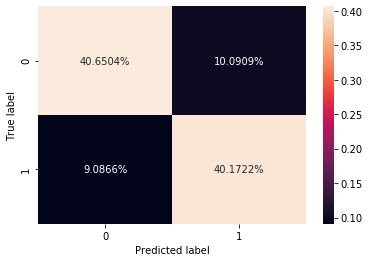

accuracy : 0.808

 classification report 

              precision    recall  f1-score   support

        FAKE       0.80      0.82      0.81      1040
        REAL       0.82      0.80      0.81      1051

    accuracy                           0.81      2091
   macro avg       0.81      0.81      0.81      2091
weighted avg       0.81      0.81      0.81      2091

LinearSVC 

confusion matrix 



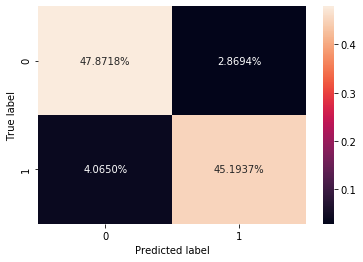

accuracy : 0.931

 classification report 

              precision    recall  f1-score   support

        FAKE       0.94      0.92      0.93      1086
        REAL       0.92      0.94      0.93      1005

    accuracy                           0.93      2091
   macro avg       0.93      0.93      0.93      2091
weighted avg       0.93      0.93      0.93      2091

KNeighborsClassifier 

confusion matrix 



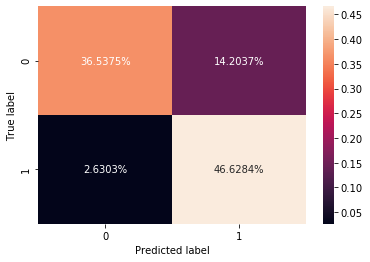

accuracy : 0.832

 classification report 

              precision    recall  f1-score   support

        FAKE       0.72      0.93      0.81       819
        REAL       0.95      0.77      0.85      1272

    accuracy                           0.83      2091
   macro avg       0.83      0.85      0.83      2091
weighted avg       0.86      0.83      0.83      2091

SGDClassifier 

confusion matrix 



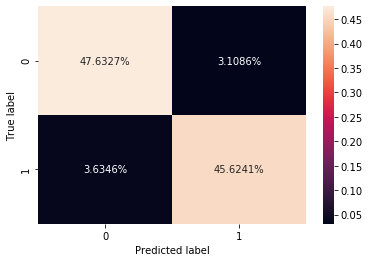

accuracy : 0.933

 classification report 

              precision    recall  f1-score   support

        FAKE       0.94      0.93      0.93      1072
        REAL       0.93      0.94      0.93      1019

    accuracy                           0.93      2091
   macro avg       0.93      0.93      0.93      2091
weighted avg       0.93      0.93      0.93      2091

RandomForestClassifier 

confusion matrix 



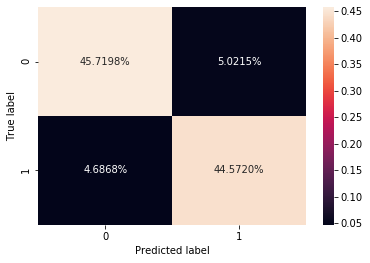

accuracy : 0.903

 classification report 

              precision    recall  f1-score   support

        FAKE       0.90      0.91      0.90      1054
        REAL       0.90      0.90      0.90      1037

    accuracy                           0.90      2091
   macro avg       0.90      0.90      0.90      2091
weighted avg       0.90      0.90      0.90      2091

PassiveAggressiveClassifier 

confusion matrix 



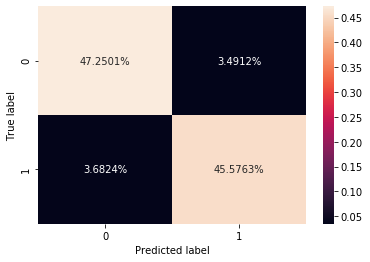

accuracy : 0.928

 classification report 

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1065
        REAL       0.93      0.93      0.93      1026

    accuracy                           0.93      2091
   macro avg       0.93      0.93      0.93      2091
weighted avg       0.93      0.93      0.93      2091

AdaBoostClassifier 

confusion matrix 



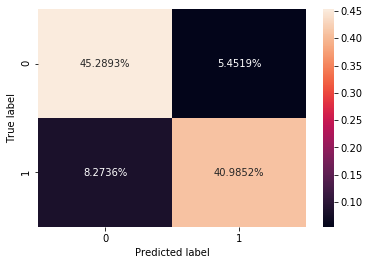

accuracy : 0.863

 classification report 

              precision    recall  f1-score   support

        FAKE       0.89      0.85      0.87      1120
        REAL       0.83      0.88      0.86       971

    accuracy                           0.86      2091
   macro avg       0.86      0.86      0.86      2091
weighted avg       0.86      0.86      0.86      2091

GradientBoostingClassifier 

confusion matrix 



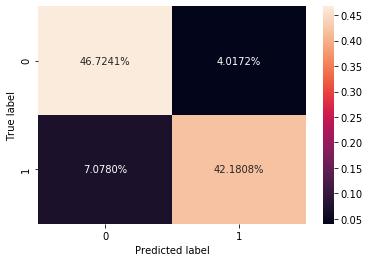

accuracy : 0.889

 classification report 

              precision    recall  f1-score   support

        FAKE       0.92      0.87      0.89      1125
        REAL       0.86      0.91      0.88       966

    accuracy                           0.89      2091
   macro avg       0.89      0.89      0.89      2091
weighted avg       0.89      0.89      0.89      2091



In [47]:
for model in modelList:
    classifier(model)

In [48]:
accuracy.append(['MultinomialNB',score1])

In [49]:
accuracy

[['LogisticRegression', 0.907221425155428],
 ['DecisionTreeClassifier', 0.8082257293161167],
 ['LinearSVC', 0.9306551889048302],
 ['KNeighborsClassifier', 0.8316594930655189],
 ['SGDClassifier', 0.9325681492109039],
 ['RandomForestClassifier', 0.9029172644667623],
 ['PassiveAggressiveClassifier', 0.9282639885222381],
 ['AdaBoostClassifier', 0.8627450980392157],
 ['GradientBoostingClassifier', 0.8890483022477284],
 ['MultinomialNB', 0.8904830224772836]]

In [50]:
accu=pd.DataFrame(accuracy,columns=['Model','Accuracy'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

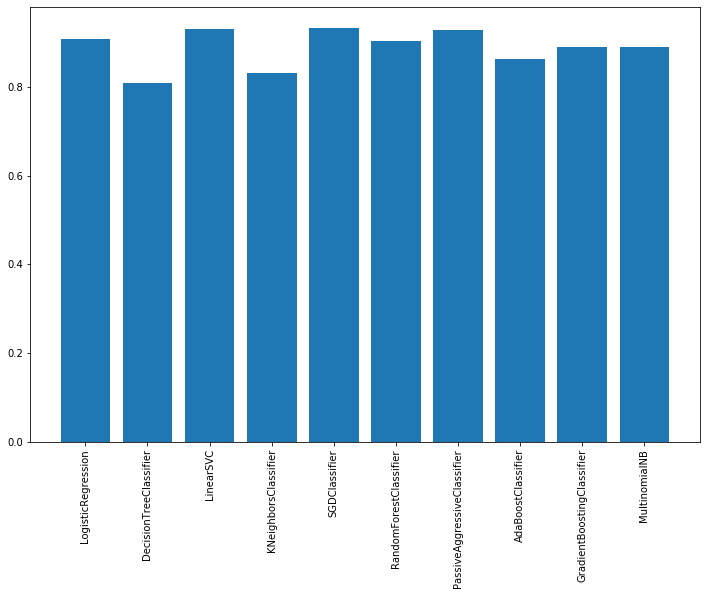

In [51]:
plt.figure(figsize=(12,8))
plt.bar(accu['Model'],accu['Accuracy'])
plt.xticks(rotation=90)

As we can see from the plot , the top 3
model that are performing better for
our data are:-
1. Stochastic Gradient Descent
2. Support Vector Classifier
3. Passive Aggressive Classifier

 Also, from the confuion matrix we can see from the above confusion matrix plots tha the Passive Aggressive Classifier has the lowest false negatives .

### Conclusion

■ Since accuracy is not always the best metrics to judge a model, so exploring the features
of confusion matrix is quite helpful.

■ In the context of confusion matrix , minimizing the false negatives is important as
declaring a real news as fake is quite dangerous and can lead to the breach of trust for
the readers.

■ As we have witnessed , the Passive Aggressive Classifier has the lowest false negatives.

■ Hence, Passive Aggressive Classifier performed better as compared to other classifiers.